<a href="https://colab.research.google.com/github/DmitryBoschWork/aquamonia-yury/blob/GoogleColabFirstBranch/tensorflowVersion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


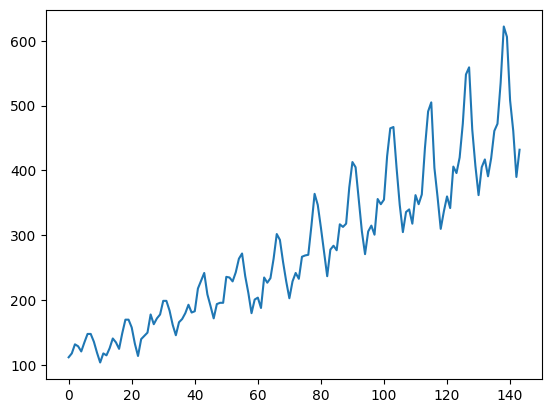

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas
import matplotlib.pyplot as plt
file_path = 'drive/My Drive/Colab Notebooks/airline-passengers.csv'
dataset = pandas.read_csv(file_path, usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [ ]:
import random
import pandas as pd
import os
from google.colab import drive

# Mount Google Drive to access files
# drive.mount('/content/drive')
drive.mount('/content/drive', force_remount=True)

# file path of the sensor data file
file_path = 'drive/My Drive/Colab Notebooks/sensor_data.csv'

# Generate random temperature and humidity values
random.seed(42)  # Set a seed for reproducibility
num_entries = 100
temperatures = [random.randint(20, 40) for _ in range(num_entries)]
humidity = [random.randint(70, 90) for _ in range(num_entries)]

# Generate timestamp in the format "yyyy-mm-dd-hh-mm"
start_timestamp = pd.Timestamp("2023-05-16 16:30")
timestamps = [start_timestamp + pd.Timedelta(minutes=i) for i in range(num_entries)]

# Create DataFrame with the generated data
data = pd.DataFrame({
    'ID': range(1, num_entries + 1),
    'timestamp': [ts.strftime("%Y-%m-%d-%H-%M") for ts in timestamps],
    'temperature': temperatures,
    'humidity': humidity
})

# Save the DataFrame to a CSV file
path_for_the_updated_data = file_path

# Check if the file exists
if os.path.isfile(path_for_the_updated_data):
    # If the file exists, overwrite it
    data.to_csv(path_for_the_updated_data, index=False)
    print("Existing 'sensor_data.csv' file overwritten.")
else:
    # If the file doesn't exist, create a new file
    data.to_csv(path_for_the_updated_data, index=False)
    print("New 'sensor_data.csv' file created.")

print("Sensor data saved to 'sensor_data.csv' file.")

Mounted at /content/drive
Existing 'sensor_data.csv' file overwritten.
Sensor data saved to 'sensor_data.csv' file.


Mounted at /content/drive
1/1 [==============================] - 0s 22ms/step


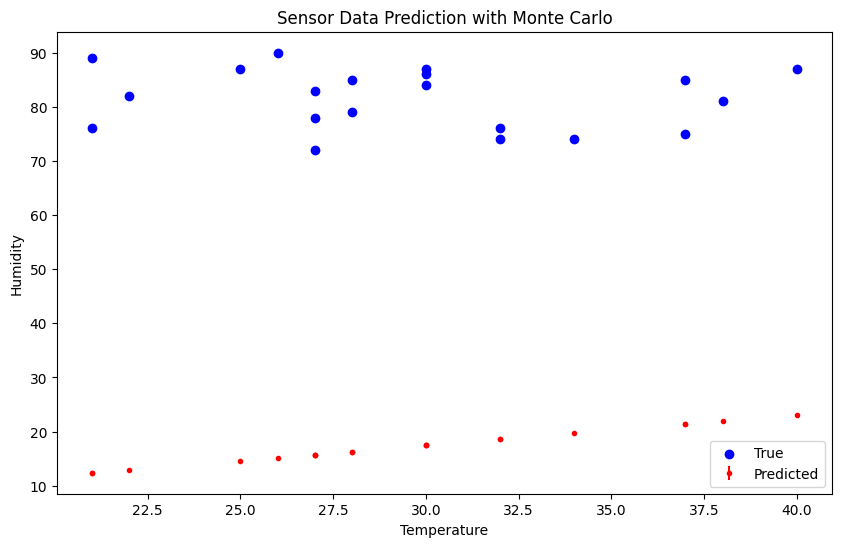

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

# Step 1: Mount Google Drive to access files
# drive.mount('/content/drive')
drive.mount('/content/drive', force_remount=True)

# Step 2: Load sensor data from CSV file using pandas
file_path = 'drive/My Drive/Colab Notebooks/sensor_data.csv'  # Update with your file path
data = pd.read_csv(file_path)
temperature = data['temperature'].values
humidity = data['humidity'].values

# Step 3: Split the data into training and validation sets
train_size = int(0.8 * len(temperature))
train_temperature, train_humidity = temperature[:train_size], humidity[:train_size]
val_temperature, val_humidity = temperature[train_size:], humidity[train_size:]

# Step 4: Define your model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Step 5: Train your model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_temperature, train_humidity, epochs=50, verbose=0)

# Step 6: Predict using Monte Carlo
num_samples = 1000  # Number of Monte Carlo samples

predictions = []
for _ in range(num_samples):
    predictions.append(model.predict(val_temperature))

predictions = np.concatenate(predictions, axis=1)  # Shape: (len(val_temperature), num_samples)

# Step 7: Analyze the predictions
mean_prediction = np.mean(predictions, axis=1)  # Mean prediction
std_prediction = np.std(predictions, axis=1)  # Standard deviation of predictions

# Step 8: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(val_temperature, val_humidity, color='b', label='True')
plt.errorbar(val_temperature, mean_prediction, yerr=std_prediction, fmt='r.', label='Predicted')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Sensor Data Prediction with Monte Carlo')
plt.legend()
plt.show()

Mounted at /content/drive
1/1 [==============================] - 0s 166ms/step


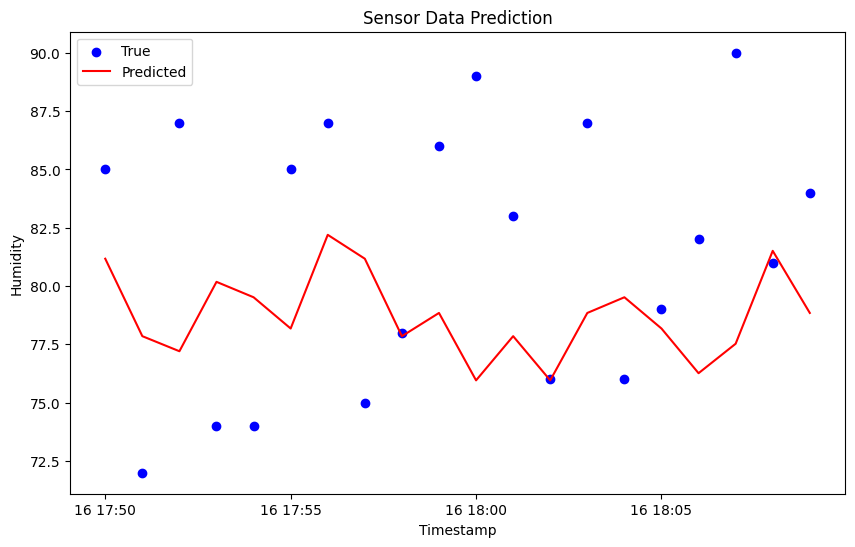

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Mount Google Drive to access files
# drive.mount('/content/drive')
drive.mount('/content/drive', force_remount=True)

# Step 2: Load sensor data from CSV file using pandas
file_path = 'drive/My Drive/Colab Notebooks/sensor_data.csv'  # Update with your file path
data = pd.read_csv(file_path)
timestamp = pd.to_datetime(data['timestamp'], format='%Y-%m-%d-%H-%M')
temperature = data['temperature'].values
humidity = data['humidity'].values

# Step 3: Perform time series analysis and visualization
# ... (you can add code here for time series analysis and visualization if needed)

# Step 4: Preprocess the data
scaler = MinMaxScaler()
temperature = scaler.fit_transform(temperature.reshape(-1, 1))
humidity = scaler.fit_transform(humidity.reshape(-1, 1))

# Step 5: Split the data into training and validation sets
train_size = int(0.8 * len(temperature))
train_temperature, train_humidity = temperature[:train_size], humidity[:train_size]
val_temperature, val_humidity = temperature[train_size:], humidity[train_size:]

# Step 6: Define and train the LSTM model
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(train_temperature, train_humidity, epochs=50, verbose=0)

# Step 7: Predict using the trained model
predictions = model.predict(val_temperature)

# Step 8: Perform cost optimization analysis
# ... (you can add code here for cost optimization analysis based on the predictions)

# Step 9: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(timestamp[train_size:], scaler.inverse_transform(val_humidity), color='b', label='True')
plt.plot(timestamp[train_size:], scaler.inverse_transform(predictions), color='r', label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Humidity')
plt.title('Sensor Data Prediction')
plt.legend()
plt.show()